In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 모델 라이브러리 선언
from sklearn import datasets, tree, linear_model

# 모델 정확도 라이브러리 선언
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
featuresData = pd.read_csv('../dataset/feature_regression_example.csv')

In [3]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155
5,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201506,2015,6,867,N,4,Y,0.208155
6,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201507,2015,7,1187,N,4,Y,0.208155
7,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201508,2015,8,970,Y,1,Y,0.208155
8,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201509,2015,9,542,N,4,Y,0.208155
9,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201510,2015,10,350,N,4,N,0.000000


In [4]:
featuresData2=featuresData[["HOLIDAY","PROMOTION"]]

In [5]:
def refining(df):
    if df['HOLIDAY']=="Y":
        return 1
    elif df['HOLIDAY']=="N":
        return 0

In [6]:
def refining2(df):
    if df['PROMOTION']=="Y":
        return 1
    elif df['PROMOTION']=="N":
        return 0

In [7]:
featuresData2["HOLIDAY"] = featuresData2.apply(refining, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
featuresData2["PROMOTION"] = featuresData2.apply(refining2, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
featuresData2.columns = ["HO_YN", "PRO_YN"]

In [10]:
featuresData = pd.merge(featuresData, featuresData2, how='outer', left_index=True, right_index=True)

In [11]:
featuresData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1


In [12]:
# featuresData["HO_YN"] = np.where(featuresData["HOLIDAY"] == "Y",1,0)
# featuresData["PRO_YN"] = np.where(featuresData["PROMOTION"] == "Y",1,0)

In [13]:
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
HO_YN             int64
PRO_YN            int64
dtype: object

In [14]:
featuresData = featuresData[(featuresData.YEARWEEK >= 201501) & \
                                (featuresData.YEARWEEK <= 201652)]

In [15]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1
5,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201506,2015,6,867,N,4,Y,0.208155,0,1
6,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201507,2015,7,1187,N,4,Y,0.208155,0,1
7,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201508,2015,8,970,Y,1,Y,0.208155,1,1
8,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201509,2015,9,542,N,4,Y,0.208155,0,1
9,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201510,2015,10,350,N,4,N,0.000000,0,0


In [16]:
corrDf = featuresData.corr()

In [17]:
corrDf

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
HO_YN,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
PRO_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [18]:
corrResult = corrDf.reset_index()

In [19]:
featuresStd = 0.5

In [20]:
# abs => 절대값으로 변환

In [21]:
features = corrResult[(corrResult.QTY != 1) & (abs(corrResult.QTY)>featuresStd)]["index"].tolist()

In [22]:
features

['HCLUS', 'PRO_PERCENT', 'HO_YN', 'PRO_YN']

In [23]:
label = ['QTY']
label

['QTY']

In [24]:
yearweekStd = 201630

In [25]:
trainingData_features = featuresData[featuresData.YEARWEEK <= yearweekStd][features]
trainingData_label = featuresData[featuresData.YEARWEEK <= yearweekStd][label]
testData_features = featuresData[featuresData.YEARWEEK > yearweekStd][features]
testData_label = featuresData[featuresData.YEARWEEK > yearweekStd]

In [26]:
type(testData_label)

pandas.core.frame.DataFrame

In [27]:
model_method = tree.DecisionTreeClassifier()

In [28]:
model_method1 = tree.DecisionTreeRegressor()

In [29]:
model_method2 = linear_model.LinearRegression()

In [30]:
model = model_method.fit(trainingData_features, trainingData_label)

In [31]:
model1 = model_method1.fit(trainingData_features, trainingData_label)

In [32]:
model2 = model_method2.fit(trainingData_features, trainingData_label)

In [33]:
predict = model.predict(testData_features)

In [34]:
predict1 = model1.predict(testData_features)

In [35]:
predict2 = model2.predict(testData_features)

In [36]:
predictData = pd.DataFrame(predict)

In [37]:
predictData1 = pd.DataFrame(predict1)

In [38]:
predictData2 = pd.DataFrame(predict2)

In [39]:
predictData.columns = ["PREDICT"]

In [40]:
predictData1.columns = ["PREDICT"]

In [41]:
predictData2.columns = ["PREDICT"]

In [42]:
testingData = pd.DataFrame(testData_label)

In [43]:
testingData1 = pd.DataFrame(testData_label)

In [44]:
testingData2 = pd.DataFrame(testData_label)

In [45]:
testingData = testingData.reset_index(drop=True)

In [46]:
testingData1 = testingData.reset_index(drop=True)

In [47]:
testingData2 = testingData2.reset_index(drop=True)

In [48]:
# merge 사용

In [49]:
mergedData = pd.merge(testingData, predictData, how='outer', left_index=True, right_index=True)

In [50]:
mergedData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,PREDICT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1,973
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1,973
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0,16
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1,968
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1,968
5,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,Y,0.308584,1,1,968
6,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,Y,0.308584,0,1,973
7,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,Y,0.308584,0,1,973
8,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,Y,0.280258,0,1,973
9,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,Y,0.280258,0,1,973


In [51]:
# concat 사용

In [52]:
mergedData1 = pd.concat([testingData1,predictData1], axis=1)

In [53]:
mergedData1

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,PREDICT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1,1606.500000
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1,1606.500000
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0,350.714286
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1,1434.600000
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1,1434.600000
5,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,Y,0.308584,1,1,1434.600000
6,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,Y,0.308584,0,1,1434.600000
7,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,Y,0.308584,0,1,1434.600000
8,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,Y,0.280258,0,1,1606.500000
9,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,Y,0.280258,0,1,1606.500000


In [54]:
mergedData2 = pd.concat([testingData2,predictData2], axis=1)

In [55]:
mergedData2

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,PREDICT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1,1411.291719
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1,1411.291719
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0,300.430915
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1,2004.962005
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1,2004.962005
5,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,Y,0.308584,1,1,2004.962005
6,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,Y,0.308584,0,1,1586.121550
7,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,Y,0.308584,0,1,1586.121550
8,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,Y,0.280258,0,1,1411.291719
9,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,Y,0.280258,0,1,1411.291719


In [56]:
mergedData.to_csv('./finalresult.csv', encoding='ms949', index=False)

In [57]:
finalResult = pd.read_csv('./finalresult.csv')

In [58]:
finalResult

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,PREDICT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1,973
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1,973
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0,16
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1,968
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1,968
5,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,Y,0.308584,1,1,968
6,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,Y,0.308584,0,1,973
7,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,Y,0.308584,0,1,973
8,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,Y,0.280258,0,1,973
9,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,Y,0.280258,0,1,973


In [59]:
# MAE

In [60]:
mean_absolute_error(finalResult['QTY'], finalResult['PREDICT'])

607.0454545454545

In [61]:
# RMSE(MSE)

In [62]:
mean_squared_error(finalResult['QTY'], finalResult['PREDICT'])

495120.2272727273

In [63]:
# R2

In [64]:
r2_score(finalResult['QTY'], finalResult['PREDICT'])

-0.060431446102753084

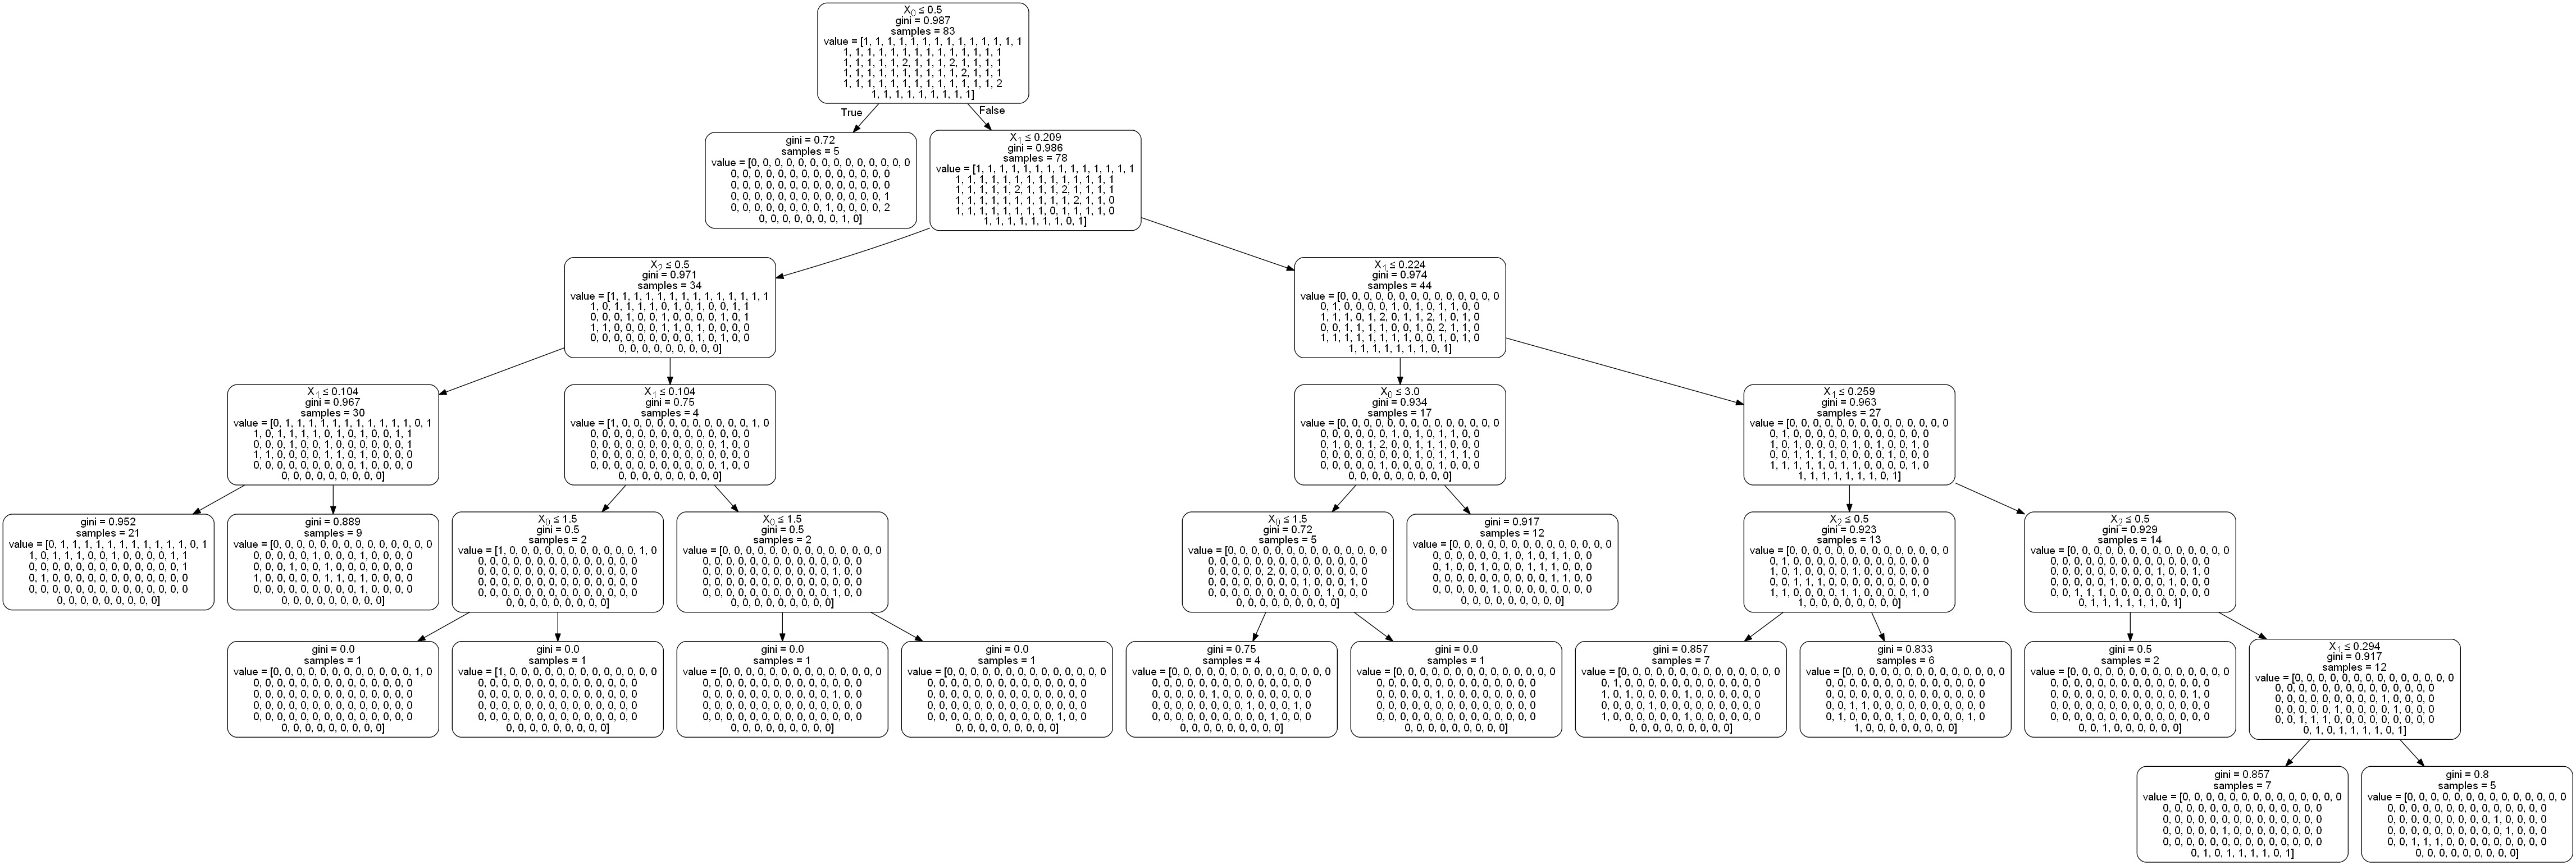

In [65]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 

                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

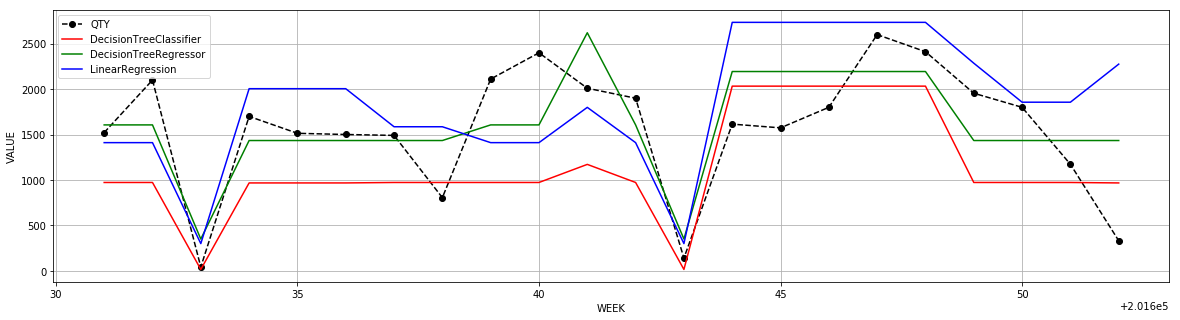

In [68]:
plt.figure(figsize = (20,5))
plt.plot(mergedData["YEARWEEK"],mergedData["QTY"], 'bo--' ,color='black', label='QTY')
plt.plot(mergedData["YEARWEEK"],mergedData["PREDICT"], color='red', label='DecisionTreeClassifier')
plt.plot(mergedData1["YEARWEEK"],mergedData1["PREDICT"],color='green', label='DecisionTreeRegressor')
plt.plot(mergedData2["YEARWEEK"],mergedData2["PREDICT"],color='blue', label='LinearRegression')
plt.grid(True)
plt.xlabel('WEEK')
plt.ylabel('VALUE')
plt.legend(loc=0)